## `Dataset 11`

Nama Dataset : HR Analytics, Predicting Candidate Hiring Decisions

Goals : Identify the key factors influencing recruitment decisions and build a classification prediction model using supervised learning to determine which candidates are eligible for hiring.

About Dataset : The company has thousands of employees with diverse levels of performance, job satisfaction, and development needs. Currently, it struggles to identify potential employee groups for talent development programs and leadership pipelines. Without data-driven segmentation, training and development initiatives are often misaligned, making HR investments less effective.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Rakamin Bootcamp - Dataset - Recruitment Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Candidate_ID             1000 non-null   object 
 1   Age                      950 non-null    float64
 2   Education_Level          950 non-null    object 
 3   Years_of_Experience      950 non-null    float64
 4   Skill_Score              950 non-null    float64
 5   Interview_Score          950 non-null    float64
 6   Previous_Company_Rating  950 non-null    float64
 7   Expected_Salary          950 non-null    float64
 8   Cultural_Fit_Score       950 non-null    float64
 9   Selected                 950 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.3+ KB


In [5]:
df.head()

,Candidate_ID,Age,Education_Level,Years_of_Experience,Skill_Score,Interview_Score,Previous_Company_Rating,Expected_Salary,Cultural_Fit_Score,Selected
0,CND0001,24.0,High School,17.0,7.0,27.0,4.0,12554.0,68.0,1.0
1,CND0002,37.0,High School,14.0,23.0,76.0,4.0,18486.0,22.0,0.0
2,CND0003,46.0,High School,1.0,91.0,78.0,2.0,11205.0,52.0,1.0
3,CND0004,32.0,PhD,9.0,40.0,86.0,5.0,13653.0,36.0,0.0
4,CND0005,28.0,Master,11.0,35.0,43.0,4.0,16182.0,8.0,0.0



`Berikut List Fitur :`
- Candidate_ID: ID unik untuk tiap kandidat
- Age: Usia kandidat
- Education_Level: Tingkat pendidikan terakhir kandidat
- Years_of_Experience: Lama pengalaman kerja (tahun)
- Skill_Score: Skor kemampuan teknis (0–100)
- Interview_Score: Skor hasil interview (0–100)
- Previous_Company_Rating: Rating perusahaan sebelumnya (1–5)
- Expected_Salary: Gaji yang diharapkan kandidat (IDR)
- Cultural_Fit_Score: Skor kecocokan budaya kerja (0–100)

Label Target :
- Selected: Label target: 1 = diterima, 0 = tidak diterima


In [6]:
# Check for missing values
print(df.isnull().sum())

Candidate_ID                0
Age                        50
Education_Level            50
Years_of_Experience        50
Skill_Score                50
Interview_Score            50
Previous_Company_Rating    50
Expected_Salary            50
Cultural_Fit_Score         50
Selected                   50
dtype: int64


In [7]:
# check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [8]:
df.describe()

,Age,Years_of_Experience,Skill_Score,Interview_Score,Previous_Company_Rating,Expected_Salary,Cultural_Fit_Score,Selected
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,34.473684,9.487368,48.273684,50.216842,3.104211,12739.940000,50.021053,0.288421
std,14.560395,5.783169,28.543034,28.350013,1.396474,48412.954724,28.878832,0.453267
min,-5.000000,0.000000,0.000000,0.000000,1.000000,-200.000000,0.000000,0.000000
25%,25.000000,4.000000,24.000000,26.000000,2.000000,5318.750000,25.000000,0.000000
50%,34.000000,9.000000,46.500000,52.000000,3.000000,9984.500000,51.000000,0.000000
75%,43.000000,14.000000,72.000000,74.000000,4.000000,15297.750000,75.000000,1.000000
max,300.000000,19.000000,99.000000,99.000000,5.000000,1000000.000000,99.000000,1.000000


In [9]:
# bagi menjadi fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Age', 'Years_of_Experience', 'Skill_Score', 'Interview_Score', 'Previous_Company_Rating', 'Expected_Salary', 'Cultural_Fit_Score', 'Selected']
Categorical Features: ['Candidate_ID', 'Education_Level']


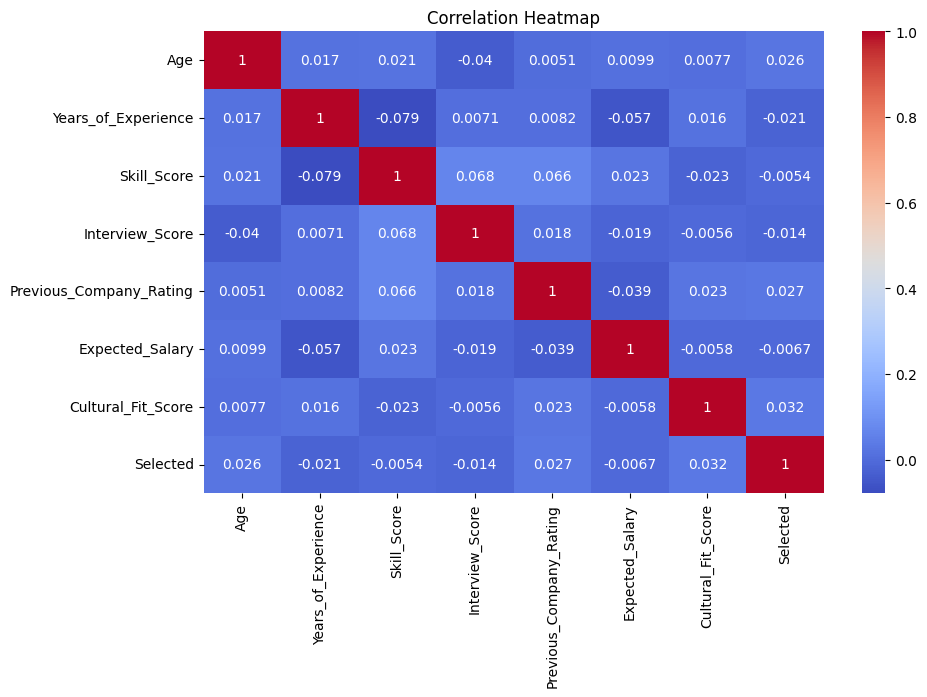

In [10]:
# heatmap untuk fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

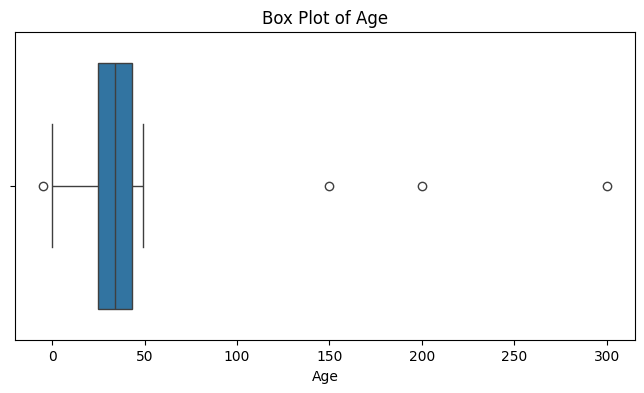

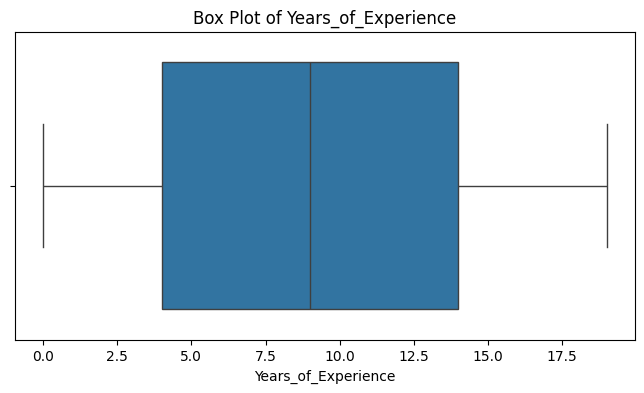

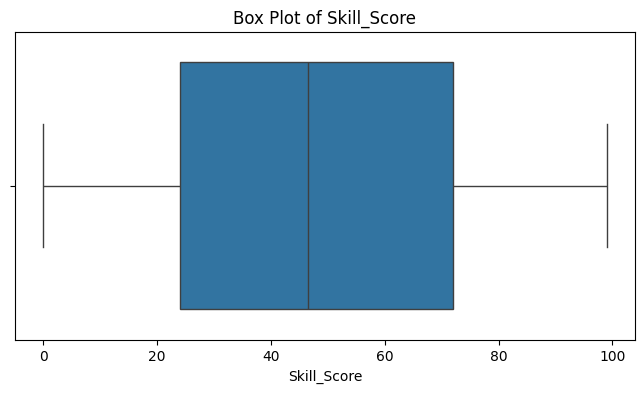

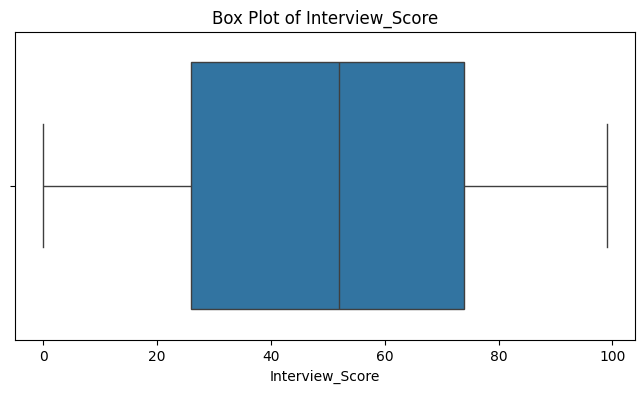

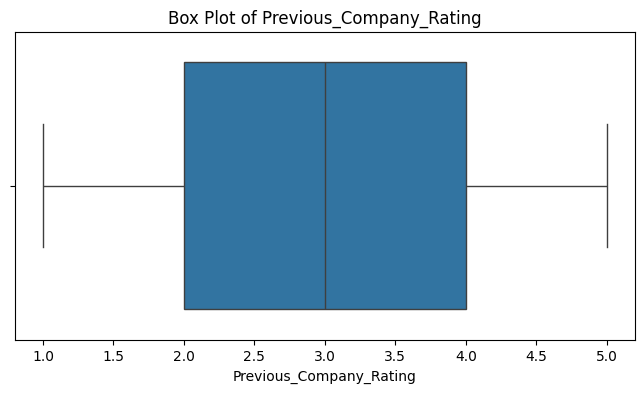

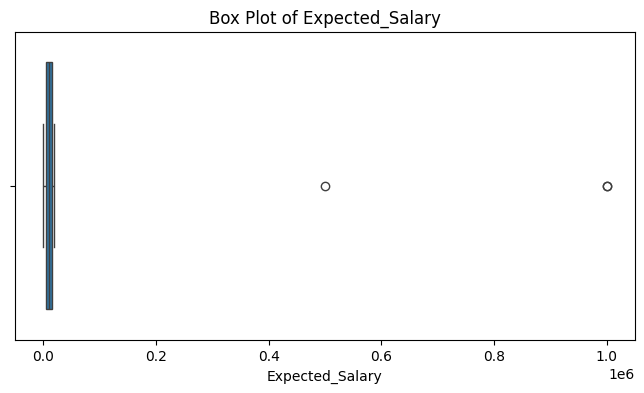

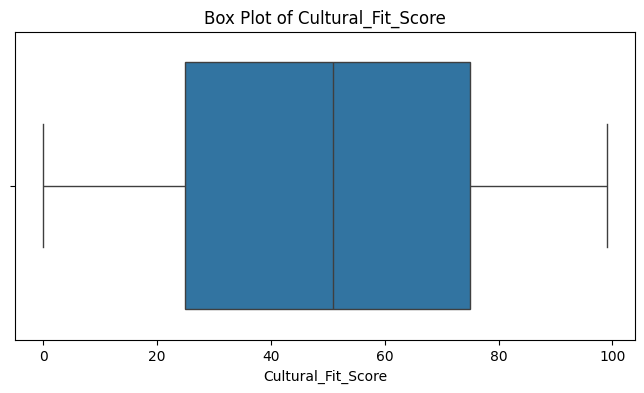

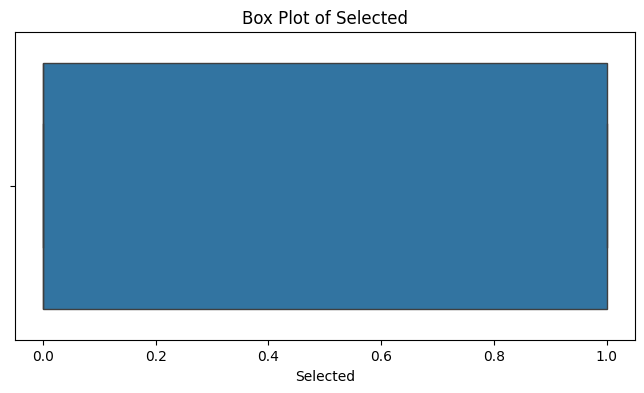

In [11]:
# box plot untuk fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()